In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv('./data/training_set_2.csv',index_col=0)
# P=[1]*2412
# N=[0]*6961
# all=P+N
# data["label"]=all
data=data.sample(frac=1,random_state=1)
train,test=train_test_split(data,test_size=0.2,random_state=1)
train_x=train.drop(["label"],axis="columns")
train_y=train["label"]
test_x=test.drop(["label"],axis="columns")
test_y=test["label"]

In [3]:
forest = RandomForestClassifier(n_estimators=1000, random_state=1,
                               n_jobs=-1)
forest.fit(train_x, train_y)
y_test_pred = forest.predict(test_x)
y_test_pred=list(y_test_pred)

In [4]:
accuracy_score(test_y,y_test_pred) 
newdata={"name":list(test_x.index),
         "true":list(test_y),
         "pre":list(y_test_pred)}
newdata=pd.DataFrame(newdata)
for i in newdata.index:
    if newdata.loc[i,"pre"]==newdata.loc[i,"true"]:#如果预测结果和序列本身的属性一样就记录为T
        newdata.loc[i,"prediction"]="T"
    else:
        newdata.loc[i,"prediction"]="F"
for i in newdata.index:
    if newdata.loc[i,"pre"]==newdata.loc[i,"true"]:#如果预测结果和序列本身的属性一样就记录为T
        newdata.loc[i,"prediction"]="T"
    else:
        newdata.loc[i,"prediction"]="F"
for i in newdata.index:
    if newdata.loc[i,"true"]==1:
        newdata.loc[i,"RBP"]="P"
    else:
        newdata.loc[i,"RBP"]="N"
newdata["ACC_MCC"]="NULL"
for i in newdata.index :
    if newdata.iloc[i,-2]=="P":
        if newdata.iloc[i,-3]=="T":
            newdata.iloc[i,-1]="TP"
        else:
            newdata.iloc[i,-1]="FN"
    if newdata.iloc[i,-2]=="N":
        if newdata.iloc[i,-3]=="T":
            newdata.iloc[i,-1]="TN"
        else:
            newdata.iloc[i,-1]="FP"
prediction= newdata["prediction"].values.tolist()
T_F=dict(zip(*np.unique(prediction, return_counts=True)))
count=T_F["T"]/len(prediction)
ACC_MCC_list= newdata["ACC_MCC"].values.tolist()
ACC_MCC=dict(zip(*np.unique(ACC_MCC_list, return_counts=True)))
TP=ACC_MCC["TP"]
TN=ACC_MCC["TN"]
FP=ACC_MCC["FP"]
FN=ACC_MCC["FN"]
ACC=(TP+TN)/(TP+TN+FN+FP)
MCC=(TP*TN-FP*FN)/math.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN))
SN=TP/(TP+FN)
SP=TN/(TN+FP)
print(ACC,MCC,SN,SP)

0.9058397464916251 0.8096740504074622 0.8524590163934426 0.9480940794809408


In [5]:
def Random_forest_prediction(test_file):
    data_test=pd.read_csv(test_file,index_col=0)
    test_indepent_x=data_test.drop(["label"],axis="columns")
    test_indepent_y=data_test["label"]
    test_indepent_y=test_indepent_y.astype(int)
    result = forest.predict(test_indepent_x)
    accuracy_score(test_indepent_y,result)  
    newdata_test={"name":list(test_indepent_x.index),
            "true":list(test_indepent_y),
            "pre":list(result)}
    newdata_test=pd.DataFrame(newdata_test)
    for i in newdata_test.index:
        if newdata_test.loc[i,"pre"]==newdata_test.loc[i,"true"]:#如果预测结果和序列本身的属性一样就记录为T
            newdata_test.loc[i,"prediction"]="T"
        else:
            newdata_test.loc[i,"prediction"]="F"
    for i in newdata_test.index:
        if newdata_test.loc[i,"true"]==1:
            newdata_test.loc[i,"RBP"]="P"
        else:
            newdata_test.loc[i,"RBP"]="N"
    newdata_test["ACC_MCC"]="NULL"
    for i in newdata_test.index :
        if newdata_test.iloc[i,-2]=="P":
            if newdata_test.iloc[i,-3]=="T":
                newdata_test.iloc[i,-1]="TP"
            else:
                newdata_test.iloc[i,-1]="FN"
        if newdata_test.iloc[i,-2]=="N":
            if newdata_test.iloc[i,-3]=="T":
                newdata_test.iloc[i,-1]="TN"
            else:
                newdata_test.iloc[i,-1]="FP"
    prediction= newdata_test["prediction"].values.tolist()
    T_F=dict(zip(*np.unique(prediction, return_counts=True)))
    count=T_F["T"]/len(prediction)
    ACC_MCC_list= newdata_test["ACC_MCC"].values.tolist()
    ACC_MCC=dict(zip(*np.unique(ACC_MCC_list, return_counts=True)))
    TP=ACC_MCC["TP"]
    TN=ACC_MCC["TN"]
    FP=ACC_MCC["FP"]
    FN=ACC_MCC["FN"]
    ACC=(TP+TN)/(TP+TN+FN+FP)
    MCC=(TP*TN-FP*FN)/math.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN))
    SN=TP/(TP+FN)
    SP=TN/(TN+FP)
    return ACC,MCC,SN,SP
test_file="./data/independent_test.csv"
ACC,MCC,SN,SP=Random_forest_prediction(test_file)

In [6]:
ACC,MCC,SN,SP

(0.8613810741687979, 0.6234716017842168, 0.8579335793357934, 0.878419452887538)

In [7]:
import math
import numpy as np
import pandas as pd
import joblib
from deepforest import CascadeForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#scikit-learn==1.0.2
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from matplotlib import rcParams
from pathlib import Path


In [8]:
def acu_curve(y,prob):
    fpr,tpr,threshold = roc_curve(y,prob) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值
 
    plt.figure()

    config = {
        "font.family":'serif',
        "font.size": 20,
        "mathtext.fontset":'stix',
        "font.serif": ['Times New Roman'],
    }
    rcParams.update(config)

    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
                lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',font=Path('TNR.ttf'),fontsize=25)
    plt.ylabel('True Positive Rate',font=Path('TNR.ttf'),fontsize=25)
    plt.title('Receiver operating characteristic example',font=Path('TNR.ttf'),fontsize=25)
    plt.legend(loc="lower right",fontsize=25)

    
    plt.show()

<Figure size 432x288 with 0 Axes>

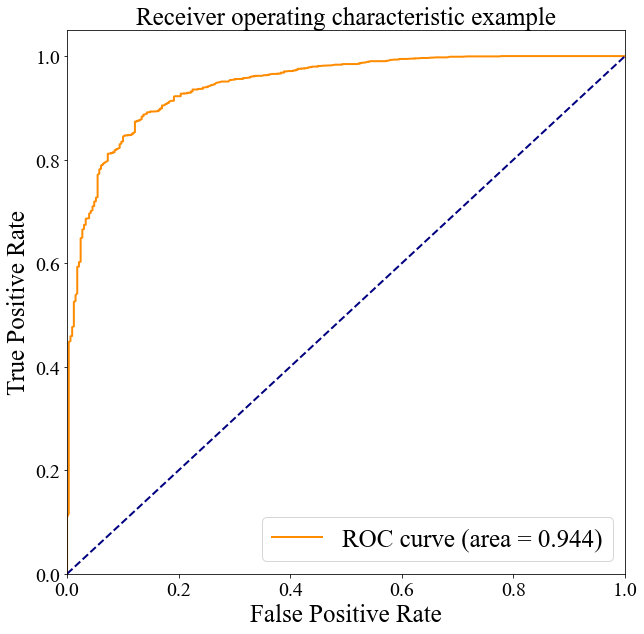

In [10]:
data_test=pd.read_csv("./data/independent_test.csv",index_col=0)
# data_test=data_test.T
# data_test["label"]="NULL"
# data_test.iloc[:1708,-1]=1
# data_test.iloc[1708:,-1]=0
test_indepent_x=data_test.drop(["label"],axis="columns")
test_indepent_y=data_test["label"]
test_indepent_y=test_indepent_y.astype(int)
y_test_pred = forest.predict_proba(test_indepent_x)[:, 1]
acu_curve(test_indepent_y,y_test_pred)

In [11]:
y_test_pred

array([0.135, 0.542, 0.713, ..., 0.082, 0.057, 0.037])